<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Sistema inteligente para ayudar a detectar posibles reclamos (glosas) en las cuentas médicas previo al cobro, de una clínica en Colombia - Audimed</h1></center>
<center><h2>Trabajo Fin de Master<br>Máster Universitario en Análisis y Visualización de Datos Masivos / Visual Analytics and Big Data</h2></center>

<h3>Presentado por: Jacqueline Guzmán Rodriguez</h3>
<h4>Tipo de trabajo: Desarrollo Software <br>
Director: Juan Carlos Rincon Acuña <br>
Fecha: Junio/2024</h4>

## Importación de librerias necesarias

In [1]:
# Load libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import myfuntions as mf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Read file CSV Download of https://www.kaggle.com/datasets/d8e399cf772f115f4350cae12016ef9f497f63389a06dfdceb3292aa7fb72956
file_cvs = "claims.csv"
# Create dataframe with information of file CSV
df_origin = pd.read_csv(file_cvs, delimiter=',', encoding='utf-8')

In [3]:
columns = df_origin.columns
target = "CLAIM"
x_columns = columns.drop(target)
print(columns)
print(target)
print(x_columns)

Index(['TYPE_ATTENTION', 'DETAIL_ATTENTION', 'SEQ_ATTENTION', 'SEQ_PATIENT',
       'SEQ_ATTEN_PATIENT', 'ROOM_ATTENTION', 'MAIN_SPECIALITY', 'ID_DOCTOR',
       'TYPE_PAYMENT_REPON', 'PAYMENT_REPONSIBLE', 'FEE_ATTENTION',
       'SEX_PATIENT', 'AGE_PATIENT_START_ATTENTION',
       'AGE_PATIENT_FINISH_ATTENTION', 'MINUTES_STAY', 'TYPE_AFFILIATE',
       'TYPE_AFFILIATION_REGIME', 'NUM_HISTORY_MED_SET_1',
       'NUM_HISTORY_MED_SET_2', 'NUM_HISTORY_MED_SET_3',
       'NUM_HISTORY_MED_SET_4', 'NUM_HISTORY_MED_SET_6',
       'NUM_HISTORY_MED_SET_7', 'NUM_HISTORY_MED_SET_8',
       'NUM_HISTORY_MED_SET_9', 'NUM_HISTORY_MED_SET_11',
       'NUM_HISTORY_MED_SET_12', 'NUM_HISTORY_MED_SET_13',
       'NUM_HISTORY_MED_SET_14', 'NUM_HISTORY_MED_SET_20',
       'NUM_HISTORY_MED_SET_23', 'NUM_HISTORY_MED_SET_24',
       'NUM_HISTORY_MED_SET_25', 'ENTRY_DIAGNOSIS', 'PRINCIPAL_DIAGNOSIS',
       'EGRESS_DIAGNOSIS', 'PREVIOUS_DIAGNOSIS', 'POST_DIAGNOSIS',
       'RELATED_DIAGNOSIS_1', 'RELATED_DIAGN

In [4]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104443 entries, 0 to 6104442
Data columns (total 55 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   TYPE_ATTENTION                int64  
 1   DETAIL_ATTENTION              int64  
 2   SEQ_ATTENTION                 int64  
 3   SEQ_PATIENT                   int64  
 4   SEQ_ATTEN_PATIENT             int64  
 5   ROOM_ATTENTION                int64  
 6   MAIN_SPECIALITY               int64  
 7   ID_DOCTOR                     int64  
 8   TYPE_PAYMENT_REPON            int64  
 9   PAYMENT_REPONSIBLE            int64  
 10  FEE_ATTENTION                 int64  
 11  SEX_PATIENT                   int64  
 12  AGE_PATIENT_START_ATTENTION   int64  
 13  AGE_PATIENT_FINISH_ATTENTION  int64  
 14  MINUTES_STAY                  int64  
 15  TYPE_AFFILIATE                int64  
 16  TYPE_AFFILIATION_REGIME       int64  
 17  NUM_HISTORY_MED_SET_1         int64  
 18  NUM_HISTORY_MED_SET_2 

In [5]:
df_origin.isnull().sum().sum()

0

In [6]:
df_origin.isnull().sum()

TYPE_ATTENTION                  0
DETAIL_ATTENTION                0
SEQ_ATTENTION                   0
SEQ_PATIENT                     0
SEQ_ATTEN_PATIENT               0
ROOM_ATTENTION                  0
MAIN_SPECIALITY                 0
ID_DOCTOR                       0
TYPE_PAYMENT_REPON              0
PAYMENT_REPONSIBLE              0
FEE_ATTENTION                   0
SEX_PATIENT                     0
AGE_PATIENT_START_ATTENTION     0
AGE_PATIENT_FINISH_ATTENTION    0
MINUTES_STAY                    0
TYPE_AFFILIATE                  0
TYPE_AFFILIATION_REGIME         0
NUM_HISTORY_MED_SET_1           0
NUM_HISTORY_MED_SET_2           0
NUM_HISTORY_MED_SET_3           0
NUM_HISTORY_MED_SET_4           0
NUM_HISTORY_MED_SET_6           0
NUM_HISTORY_MED_SET_7           0
NUM_HISTORY_MED_SET_8           0
NUM_HISTORY_MED_SET_9           0
NUM_HISTORY_MED_SET_11          0
NUM_HISTORY_MED_SET_12          0
NUM_HISTORY_MED_SET_13          0
NUM_HISTORY_MED_SET_14          0
NUM_HISTORY_ME

In [7]:
df_stats = df_origin.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,0.270755,0.444350,0.00,0.00,0.00,1.00,1.000000e+00
DETAIL_ATTENTION,6104443.0,0.987709,1.327567,0.00,0.00,0.00,2.00,5.000000e+00
SEQ_ATTENTION,6104443.0,360815.369904,211311.352889,0.00,177299.00,356929.00,544101.00,7.282170e+05
SEQ_PATIENT,6104443.0,45006.381899,32005.008963,0.00,17068.00,38729.00,69640.00,1.188210e+05
SEQ_ATTEN_PATIENT,6104443.0,2.856935,2.864190,1.00,1.00,2.00,4.00,5.400000e+01
ROOM_ATTENTION,6104443.0,0.114405,1.918862,0.00,0.00,0.00,0.00,5.800000e+01
MAIN_SPECIALITY,6104443.0,189.192464,248.312212,1.00,1.00,1.00,387.00,9.990000e+02
ID_DOCTOR,6104443.0,244.130384,177.514360,0.00,63.00,283.00,372.00,6.390000e+02
TYPE_PAYMENT_REPON,6104443.0,0.959849,0.196314,0.00,1.00,1.00,1.00,1.000000e+00
PAYMENT_REPONSIBLE,6104443.0,21640.045017,2321.100772,0.00,21967.00,22002.00,22052.00,2.240900e+04


In [8]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df_origin)
df = pd.DataFrame(df,columns=columns)

In [9]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,0.270755,0.444350,0.0,0.000000,0.000000,1.000000,1.0
DETAIL_ATTENTION,6104443.0,0.197542,0.265513,0.0,0.000000,0.000000,0.400000,1.0
SEQ_ATTENTION,6104443.0,0.495478,0.290176,0.0,0.243470,0.490141,0.747169,1.0
SEQ_PATIENT,6104443.0,0.378775,0.269355,0.0,0.143645,0.325944,0.586092,1.0
SEQ_ATTEN_PATIENT,6104443.0,0.035037,0.054041,0.0,0.000000,0.018868,0.056604,1.0
ROOM_ATTENTION,6104443.0,0.001972,0.033084,0.0,0.000000,0.000000,0.000000,1.0
MAIN_SPECIALITY,6104443.0,0.188570,0.248810,0.0,0.000000,0.000000,0.386774,1.0
ID_DOCTOR,6104443.0,0.382051,0.277800,0.0,0.098592,0.442879,0.582160,1.0
TYPE_PAYMENT_REPON,6104443.0,0.959849,0.196314,0.0,1.000000,1.000000,1.000000,1.0
PAYMENT_REPONSIBLE,6104443.0,0.965685,0.103579,0.0,0.980276,0.981838,0.984069,1.0


In [10]:
columns = df.columns
target = "CLAIM"
x_columns = columns.drop(target)
print(columns)
print(target)
print(x_columns)

Index(['TYPE_ATTENTION', 'DETAIL_ATTENTION', 'SEQ_ATTENTION', 'SEQ_PATIENT',
       'SEQ_ATTEN_PATIENT', 'ROOM_ATTENTION', 'MAIN_SPECIALITY', 'ID_DOCTOR',
       'TYPE_PAYMENT_REPON', 'PAYMENT_REPONSIBLE', 'FEE_ATTENTION',
       'SEX_PATIENT', 'AGE_PATIENT_START_ATTENTION',
       'AGE_PATIENT_FINISH_ATTENTION', 'MINUTES_STAY', 'TYPE_AFFILIATE',
       'TYPE_AFFILIATION_REGIME', 'NUM_HISTORY_MED_SET_1',
       'NUM_HISTORY_MED_SET_2', 'NUM_HISTORY_MED_SET_3',
       'NUM_HISTORY_MED_SET_4', 'NUM_HISTORY_MED_SET_6',
       'NUM_HISTORY_MED_SET_7', 'NUM_HISTORY_MED_SET_8',
       'NUM_HISTORY_MED_SET_9', 'NUM_HISTORY_MED_SET_11',
       'NUM_HISTORY_MED_SET_12', 'NUM_HISTORY_MED_SET_13',
       'NUM_HISTORY_MED_SET_14', 'NUM_HISTORY_MED_SET_20',
       'NUM_HISTORY_MED_SET_23', 'NUM_HISTORY_MED_SET_24',
       'NUM_HISTORY_MED_SET_25', 'ENTRY_DIAGNOSIS', 'PRINCIPAL_DIAGNOSIS',
       'EGRESS_DIAGNOSIS', 'PREVIOUS_DIAGNOSIS', 'POST_DIAGNOSIS',
       'RELATED_DIAGNOSIS_1', 'RELATED_DIAGN

<Axes: xlabel='CLAIM', ylabel='Count'>

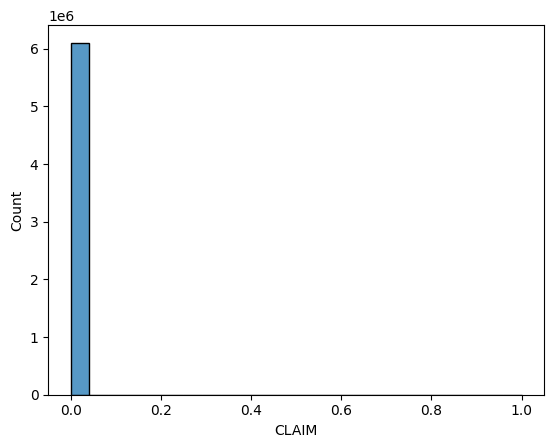

In [11]:
sns.histplot(data=df, x=target)

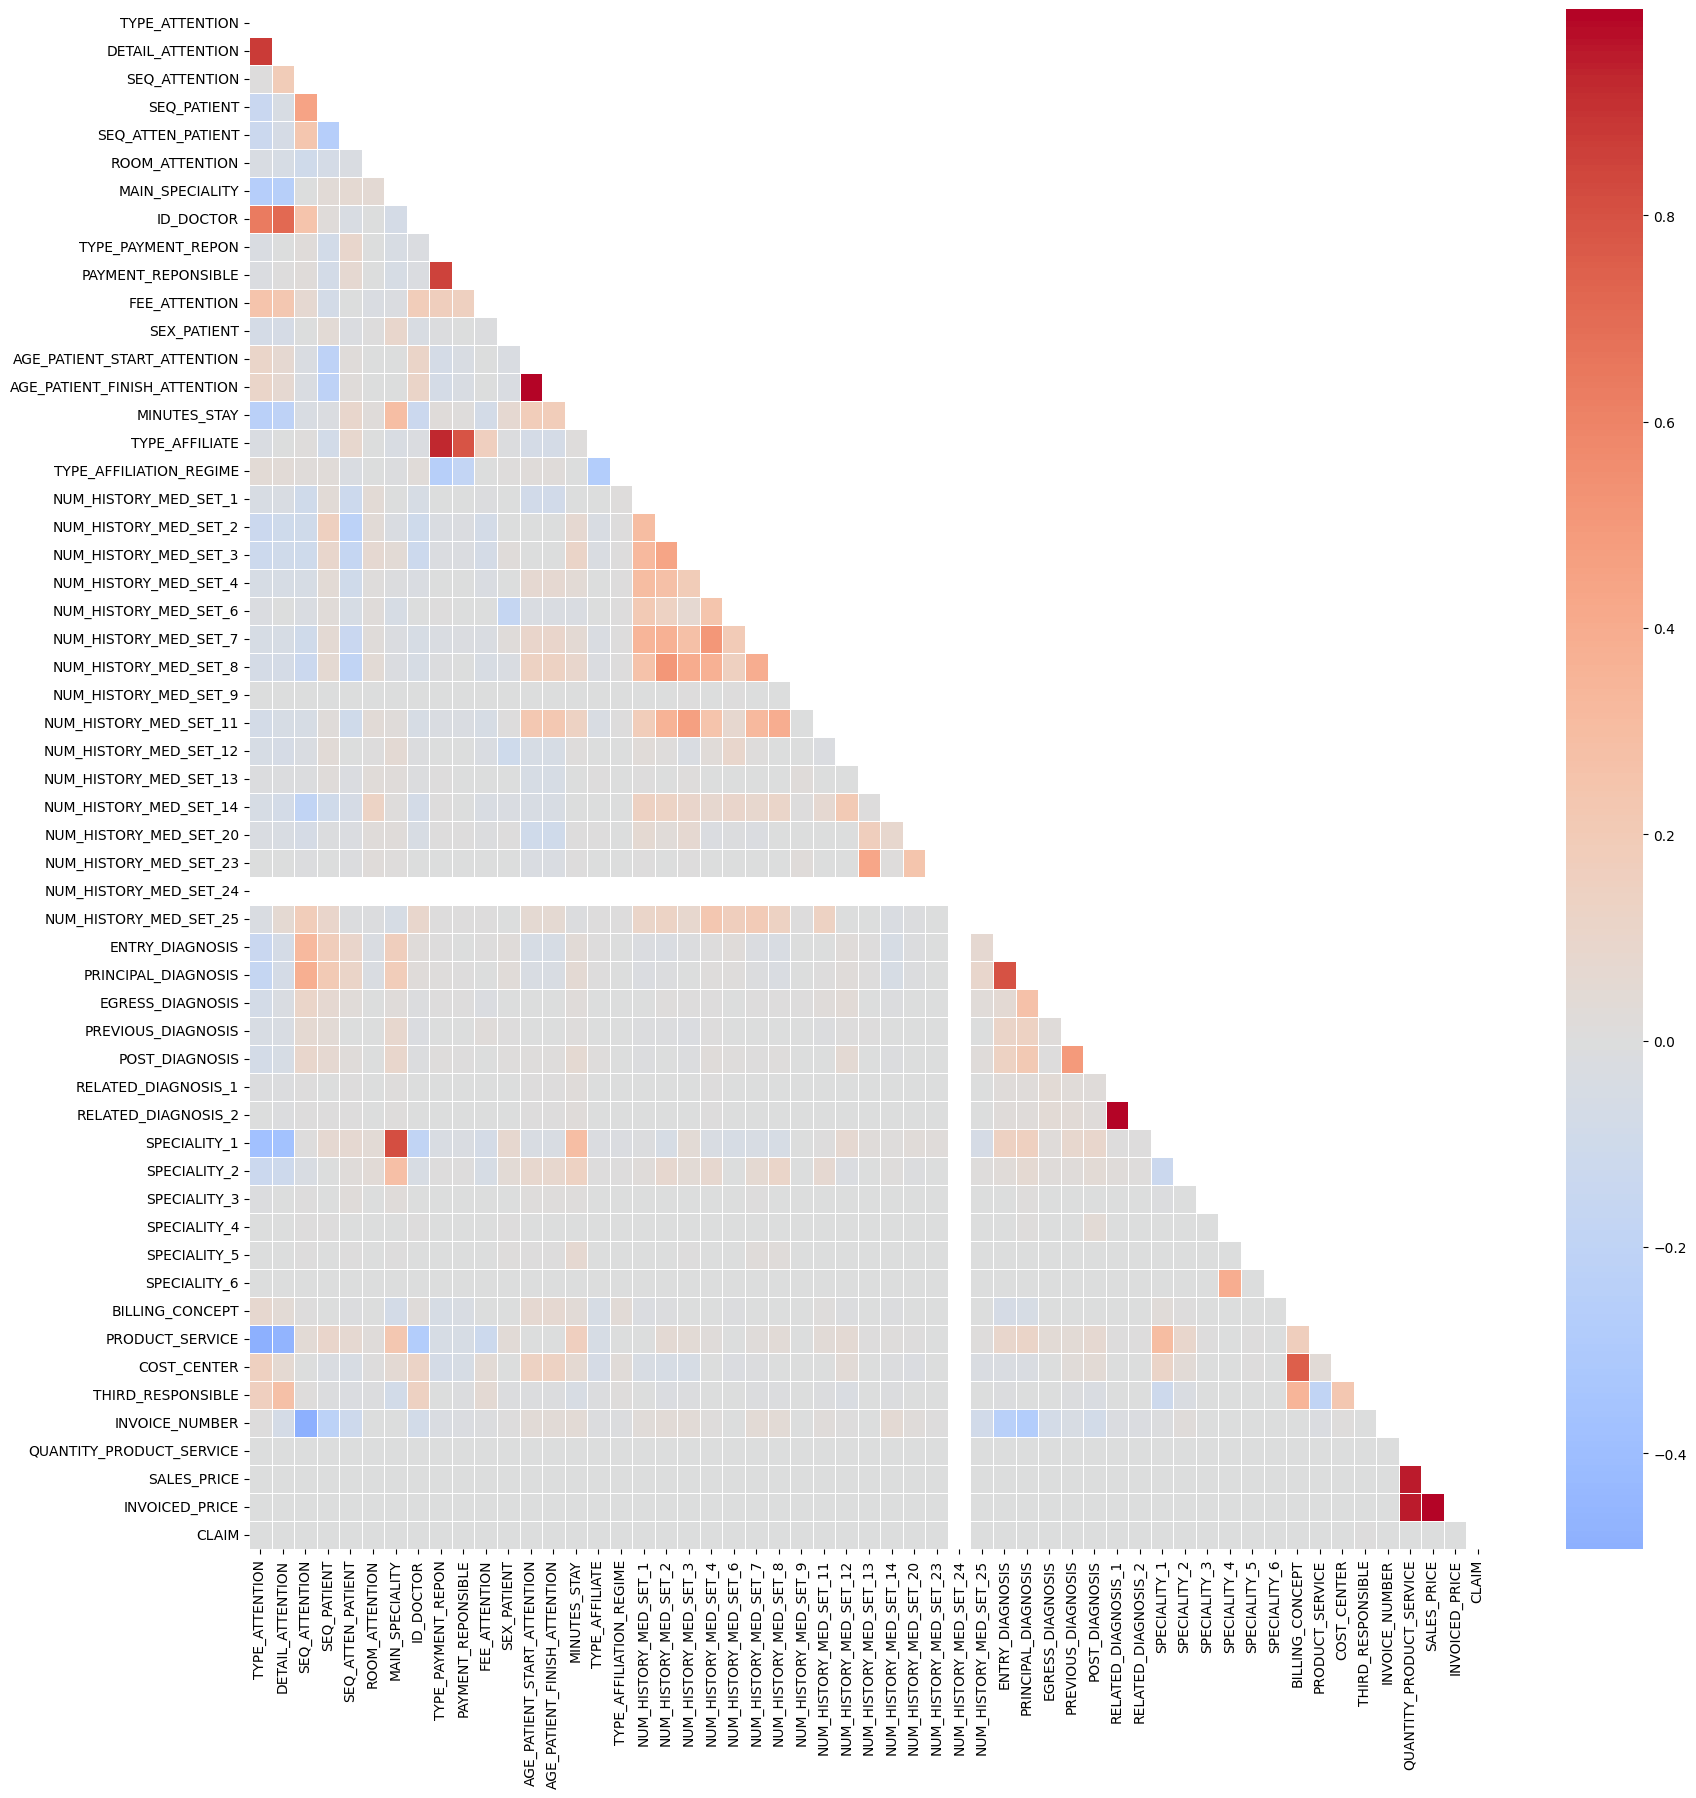

In [12]:
corr = df.corr(method="pearson")
plt.figure(figsize=(20,20)) 
mask=np.triu(np.ones_like(corr,dtype=bool))
cmap='coolwarm'
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, linewidths=0.5, fmt='.2f', annot=False) 
plt.show()

In [13]:
corr

,TYPE_ATTENTION,DETAIL_ATTENTION,SEQ_ATTENTION,SEQ_PATIENT,SEQ_ATTEN_PATIENT,ROOM_ATTENTION,MAIN_SPECIALITY,ID_DOCTOR,TYPE_PAYMENT_REPON,PAYMENT_REPONSIBLE,...,SPECIALITY_6,BILLING_CONCEPT,PRODUCT_SERVICE,COST_CENTER,THIRD_RESPONSIBLE,INVOICE_NUMBER,QUANTITY_PRODUCT_SERVICE,SALES_PRICE,INVOICED_PRICE,CLAIM
TYPE_ATTENTION,1.000000,0.874689,0.006946,-0.142699,-0.131204,-0.035764,-0.257796,0.633966,-0.025443,-0.015574,...,-1.016843e-03,0.073117,-0.492790,0.152111,0.163858,0.007085,-3.123674e-04,-3.436679e-04,-3.418773e-04,-2.701617e-03
DETAIL_ATTENTION,0.874689,1.000000,0.194298,-0.038104,-0.058713,-0.043856,-0.250607,0.713644,0.001250,0.003868,...,1.545022e-05,0.044087,-0.470528,0.059722,0.279704,-0.066412,-3.765120e-04,-4.153017e-04,-4.135023e-04,-3.243050e-03
SEQ_ATTENTION,0.006946,0.194298,1.000000,0.450526,0.239593,-0.100000,-0.007936,0.255284,0.016477,0.015152,...,-2.760966e-03,0.007922,0.042704,-0.005578,0.013476,-0.488469,-5.529185e-04,-4.657401e-04,-4.656592e-04,-5.149950e-04
SEQ_PATIENT,-0.142699,-0.038104,0.450526,1.000000,-0.255117,-0.065160,0.033665,0.022911,-0.083511,-0.067851,...,-1.632103e-03,-0.000522,0.100902,-0.025822,-0.010565,-0.221002,-6.826055e-05,1.023672e-04,1.020098e-04,1.010852e-03
SEQ_ATTEN_PATIENT,-0.131204,-0.058713,0.239593,-0.255117,1.000000,-0.031521,0.057537,-0.033331,0.086812,0.071756,...,-1.081924e-03,-0.012087,0.067723,-0.038315,-0.020386,-0.112688,-3.129560e-04,-3.603281e-04,-3.605235e-04,-1.784343e-04
ROOM_ATTENTION,-0.035764,-0.043856,-0.100000,-0.065160,-0.031521,1.000000,0.054456,-0.006794,-0.003317,-0.004644,...,-9.949507e-05,0.002465,0.020211,0.002941,-0.011256,0.002329,-2.721459e-05,-3.306109e-05,-3.315671e-05,-2.643452e-04
MAIN_SPECIALITY,-0.257796,-0.250607,-0.007936,0.033665,0.057537,0.054456,1.000000,-0.062593,-0.043689,-0.044393,...,-1.264754e-03,-0.075449,0.228602,0.052516,-0.079427,0.000238,-3.546850e-04,-4.136651e-04,-4.145276e-04,-1.288889e-03
ID_DOCTOR,0.633966,0.713644,0.255284,0.022911,-0.033331,-0.006794,-0.062593,1.000000,-0.019463,-0.015985,...,1.202087e-03,0.018855,-0.272540,0.121050,0.148311,-0.084361,-6.805133e-04,-7.655617e-04,-7.644647e-04,-4.857932e-03
TYPE_PAYMENT_REPON,-0.025443,0.001250,0.016477,-0.083511,0.086812,-0.003317,-0.043689,-0.019463,1.000000,0.853466,...,3.413109e-04,-0.051686,-0.051693,-0.063511,-0.008496,-0.021040,9.906269e-05,1.105262e-04,1.109734e-04,9.068177e-04
PAYMENT_REPONSIBLE,-0.015574,0.003868,0.015152,-0.067851,0.071756,-0.004644,-0.044393,-0.015985,0.853466,1.000000,...,2.602332e-04,-0.037229,-0.046516,-0.047911,-0.008979,-0.017008,9.123265e-05,1.170832e-04,1.174633e-04,6.957665e-04


In [17]:
sns.pairplot(df, hue=target, height=2.5)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020B6C03D3F0> (for post_execute):


KeyboardInterrupt: 